<a href="https://colab.research.google.com/github/AhmedOsama93/20190015_20190220_20190437/blob/main/faceRecognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import imread
from sklearn.decomposition import PCA
from scipy.stats import stats
import matplotlib.image as mpimg


In [101]:
imageA=imread("/subject11.centerlight.jpg")
imageA=imageA.astype(np.uint8)
imageA = imageA/255


In [102]:

imageB=imread("/subject11.happy.jpg")
imageB=imageB.astype(np.uint8)
imageB = imageB/255


In [103]:

def transform(image,percentage):
    image_pca = PCA(n_components=percentage).fit(imageB)
    transformed = image_pca.transform(image)
    projected = image_pca.inverse_transform(transformed)
    return projected
transform(imageA,150)


array([[0.51001448, 0.5099541 , 0.50999026, ..., 0.9995679 , 0.99975886,
        0.99954908],
       [0.99997089, 0.99998003, 0.99997353, ..., 1.00000824, 1.00001791,
        1.00006794],
       [0.99997089, 0.99998003, 0.99997353, ..., 1.00000824, 1.00001791,
        1.00006794],
       ...,
       [0.74163969, 0.7373241 , 0.73262893, ..., 0.45616146, 0.4167498 ,
        0.27390056],
       [0.69032566, 0.68482825, 0.67768564, ..., 0.39898577, 0.36714148,
        0.25541994],
       [0.26641245, 0.26650347, 0.26656661, ..., 0.26655229, 0.26644322,
        0.26740707]])

In [104]:
img1=transform(imageA,0.15)

img2=transform(imageB,0.15)
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension

	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
 
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

mse(imageA, imageB)



0.03602619956237155

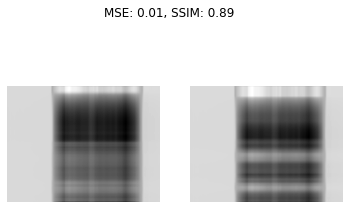

In [105]:

def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()
 
compare_images(img1, img2, 1)